# IMPORTS




In [159]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts

# IMPORTANDO DATASET


In [160]:
data = pd.read_csv('Churn.csv',sep=';') #Lendo o dataset e separando as colunas por ';'
data.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# ANÁLISE EXPLORATÓRIA



Faremos uma análise para descobrir o que exatamente vamos tratar no nosso dataset. 
Primeiro iremos dar os nomes às colunas 

In [161]:
data.columns = ['Id','Score','Estado','Genero','Idade','Patrimônio','Saldo','Produtos','PossuiCred','Ativo','Salario','Saiu']
data.head()

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,PossuiCred,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


<Axes: xlabel='Estado'>

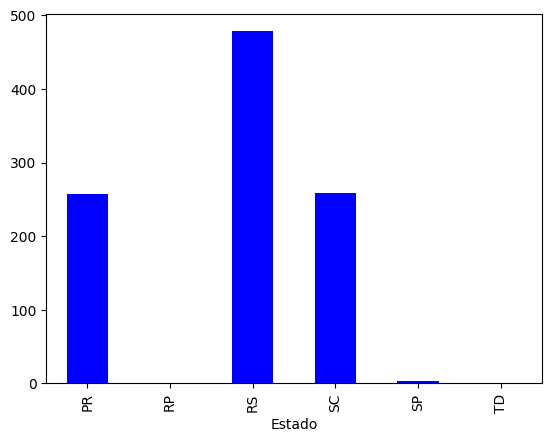

In [162]:
estado = data.groupby(['Estado']).size()
estado.plot.bar(color='blue')
# Podemos verificar que os estado RP e TD estão errados e SP está fora do domínio

<Axes: xlabel='Genero'>

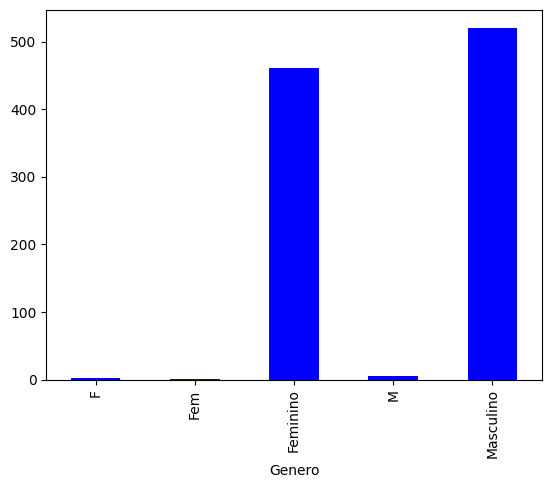

In [163]:
genero = data.groupby(['Genero']).size()
genero.plot.bar(color='blue')
# Como temos várias maneiras de dizer F e M, iremos juntar todas em uma só

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

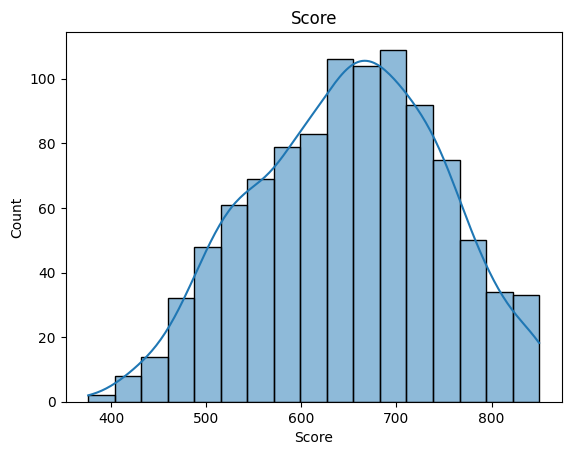

In [164]:
sns.histplot(data['Score'], kde=True).set_title('Score')
data['Score'].describe()
# Tudo no padrão

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

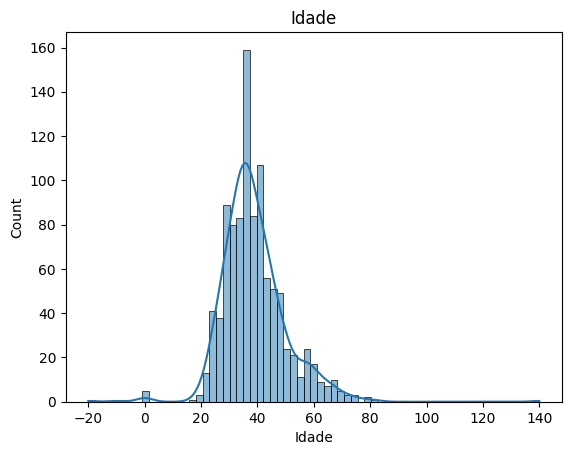

In [165]:
sns.histplot(data['Idade'], kde=True).set_title('Idade')
data['Idade'].describe()
# Podemos ver que existem idades negativas, e muito maiores que um ser humano normal. teremos que substitui-las no intervalo 18 - 90 anos

count    999.000000
mean       5.069069
std        2.927691
min        0.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Patrimônio, dtype: float64

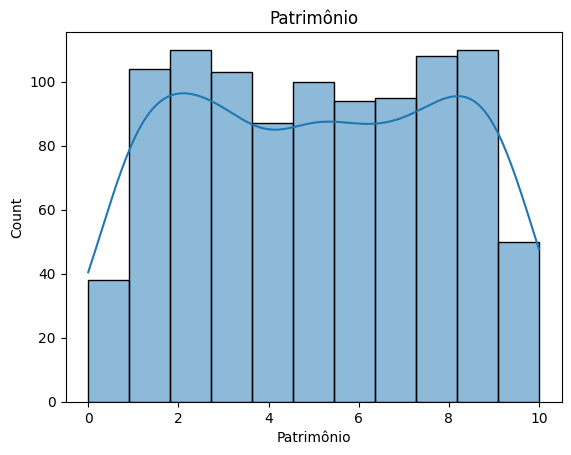

In [166]:
sns.histplot(data['Patrimônio'], kde=True).set_title('Patrimônio')
data['Patrimônio'].describe()
# Tudo no padrão

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

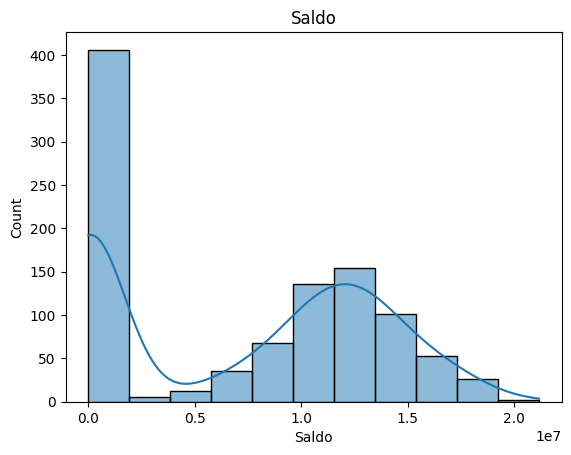

In [167]:
sns.histplot(data['Saldo'], kde=True).set_title('Saldo')
data['Saldo'].describe()
# Tudo no padrão

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,PossuiCred,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


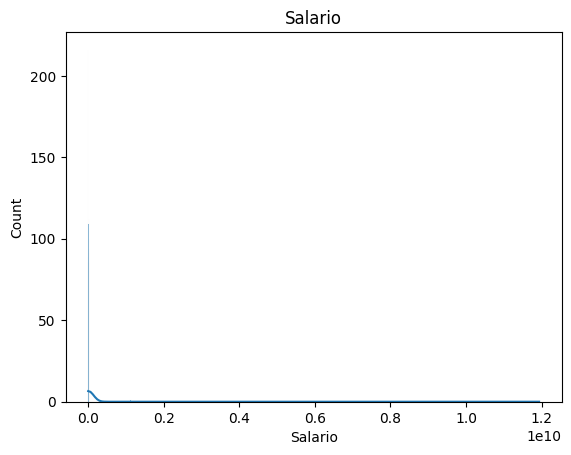

In [168]:
sns.histplot(data['Salario'], kde=True).set_title('Salario')
desvio = sts.stdev(data['Salario'].dropna())
data.loc[data['Salario'] >= 2 * desvio] # levamos em conta o nosso padrão para esse datset 2 * o desvio padrão dos salarios
# verificamos que existem alguns salarios que estão muito fora do padrão, então vamos retirá-los

In [169]:
data.isnull().sum()
# Verificamos que alguns dados são Nulos

Id            0
Score         0
Estado        0
Genero        8
Idade         0
Patrimônio    0
Saldo         0
Produtos      0
PossuiCred    0
Ativo         0
Salario       7
Saiu          0
dtype: int64

In [170]:
data[data.duplicated(['Id'],keep=False)]
# Verificamos que existe somente uma linha duplicada

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,PossuiCred,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


# TRATAMENTO DE DADOS

Vamos começar o tratamento de dados. Recapitulando, temos os seguintes erros:
- dados que não foram preenchidos (Genero e Salario)
- valores de salário muito fora do padrão
- estados inexistentes (TD,RP) e fora do domínio (SP)
- gêneros com mais de um nome
- idades fora do limite 18 a 90 anos
- dados duplicados

In [171]:
# Quando tratamos dados numéricos não preenchidos, substituimos os valores Null pela média dos valores restantes da coluna tratada

mediana = sts.median(data['Salario'])
data['Salario'].fillna(mediana,inplace=True)
data['Salario'].isnull().sum()# verificamos que não existem mais valores nulos na coluna Salário



0

In [172]:
# Tratando de dados não numéricos, podemos substiuir os valores Null pela moda do resto dos valores

moda = sts.mode(data['Genero'])
data['Genero'].fillna(moda,inplace=True)
data['Genero'].isnull().sum()# verificamos que não existem mais valores nulos na coluna Salário

0

In [173]:
data.isnull().sum()
# Agora não exitem dados Nulos no nosso dataset


Id            0
Score         0
Estado        0
Genero        0
Idade         0
Patrimônio    0
Saldo         0
Produtos      0
PossuiCred    0
Ativo         0
Salario       0
Saiu          0
dtype: int64

In [174]:
mediana = sts.median(data['Salario'])
data.loc[data['Salario'] >= 2 * desvio, 'Salario'] = mediana
# trocamos todos os salários muito fora do nosso padrão pela mediana dos salários


<Axes: xlabel='Estado'>

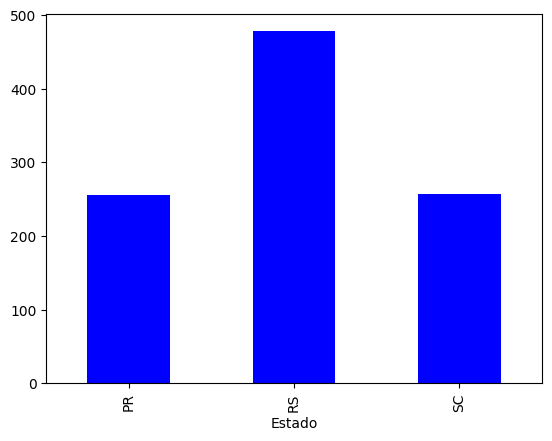

In [180]:
#Agora vamos trocar o valor dos estados inexistentes (TD,RP) e fora do domínio (SP) pela moda dos estados restantes

moda = sts.mode(data['Estado'])
data.loc[data['Estado'].isin(['TD','RP','SP']), 'Estado'] = moda
estado = data.groupby(['Estado']).size()
estado.plot.bar(color='blue')

<Axes: xlabel='Genero'>

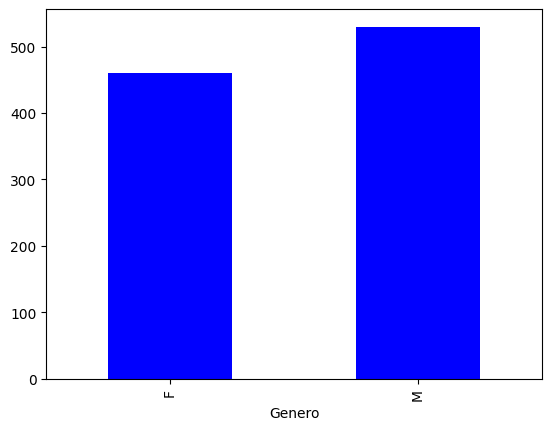

In [181]:
#Agora vamos trocar o fazer um merge dos generos (F,M) em uma categoria só

estado = data.groupby(['Genero']).size()
data.loc[data['Genero'] == 'Masculino', 'Genero'] = 'M'
data.loc[data['Genero'].isin(['Feminino','Fem']), 'Genero'] = 'F'
estado.plot.bar(color='blue')

count    999.000000
mean      39.089089
std       10.310270
min       18.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

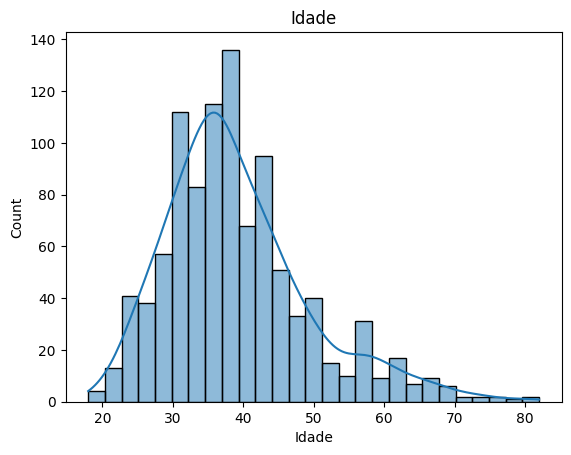

In [177]:
# Para as idades fora do limite 18 a 90 anos, iremos substituir esses valores pela mediana. Mas primeiro, vamos verificar a menor e maior idade

mediana = sts.median(data['Idade'])
data.loc[(data['Idade'] < 18) | (data['Idade'] > 90)] = mediana
sns.histplot(data['Idade'], kde=True).set_title('Idade')
data['Idade'].describe() # aqui verificamos que foram removidas todas idades menores que 18 e maiores que 90

In [178]:
# Por fim, iremos apagar os dados duplicados

data.drop_duplicates(subset='Id',keep='first',inplace=True)
data[data.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,PossuiCred,Ativo,Salario,Saiu
